In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the dataset
df = pd.read_csv('Exam_Score_Prediction.csv')

In [5]:
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [6]:
#check for missing data
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [7]:
# We select the numberical columns and categorial columns and put them into variables
categorial_cols = ['gender','course', 'internet_access','sleep_quality','study_method', 'facility_rating','exam_difficulty']
numerical_cols = ['age','study_hours', 'class_attendance','sleep_hours']

In [8]:
# Here we split the data into features and target
from sklearn.model_selection import train_test_split
y = df['exam_score']
X = df.drop(columns = ['exam_score'])

In [9]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

In [10]:
# here we deal with the non-numerical columns by using OneHotEncoder and we use StandardScaler for numerical columns
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers = [
        ('categorial' ,OneHotEncoder(drop = 'first',handle_unknown='ignore'),categorial_cols),
        ('numerical' ,scaler ,numerical_cols )
    ]
)


In [85]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
# Here we use a pipline to connect preprocessing and the model and later combine them in ordered steps to avoid mistakes 
model = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor())
])

In [87]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size = 0.2 )

model.fit(X_train , y_train)

y_pred = model.predict(X_test)


In [88]:
# Here we calculate the MAE and RMSE And R2 Score for checking the error rate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 8.53484133
RMSE: 10.57459691667936
R² Score: 0.6873831919777449


In [89]:
# Here we show the diffrence between predicted and original Score
predicted = pd.DataFrame({
    'Original': y_test.values,
    'Predicted':y_pred
})
predicted.head(5)

,Original,Predicted
0,31.1,36.25298
1,81.6,73.40400
2,68.0,56.85600
3,100.0,95.95300
4,84.8,84.41800


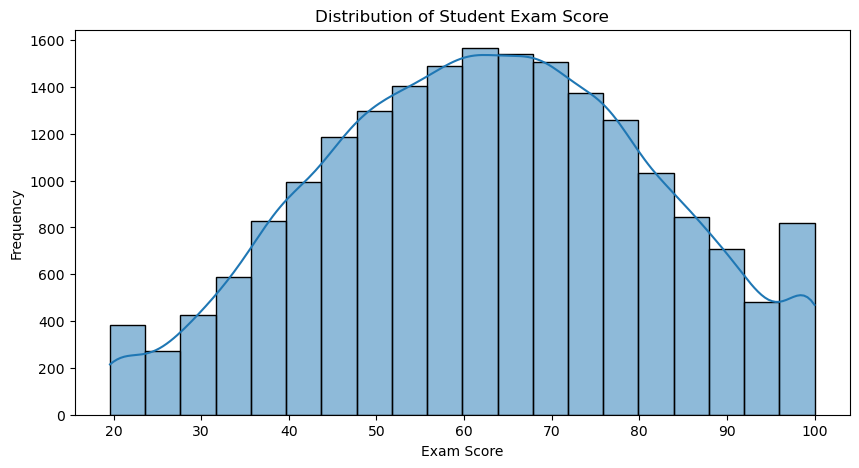

In [90]:
plt.figure(figsize =(10,5))
sns.histplot(df['exam_score'], kde=True , bins=20)
plt.title('Distribution of Student Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

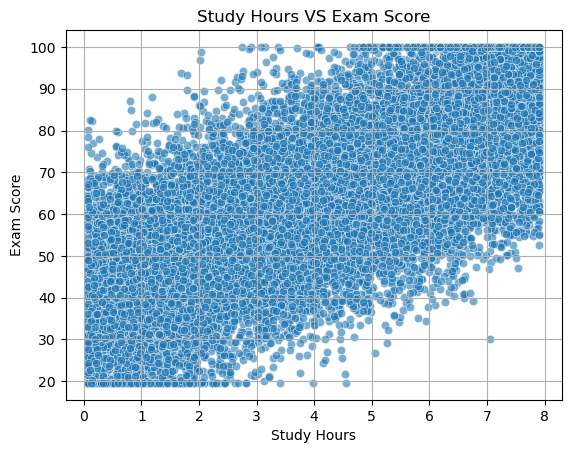

In [91]:
sns.scatterplot(x='study_hours', y='exam_score', data=df, alpha=0.6)
plt.title('Study Hours VS Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

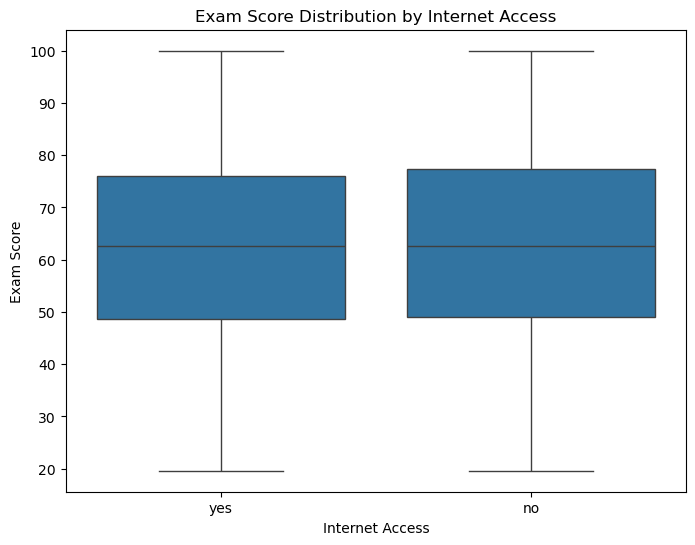

In [92]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='internet_access', y='exam_score', data=df)
plt.title('Exam Score Distribution by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Exam Score')
plt.show()

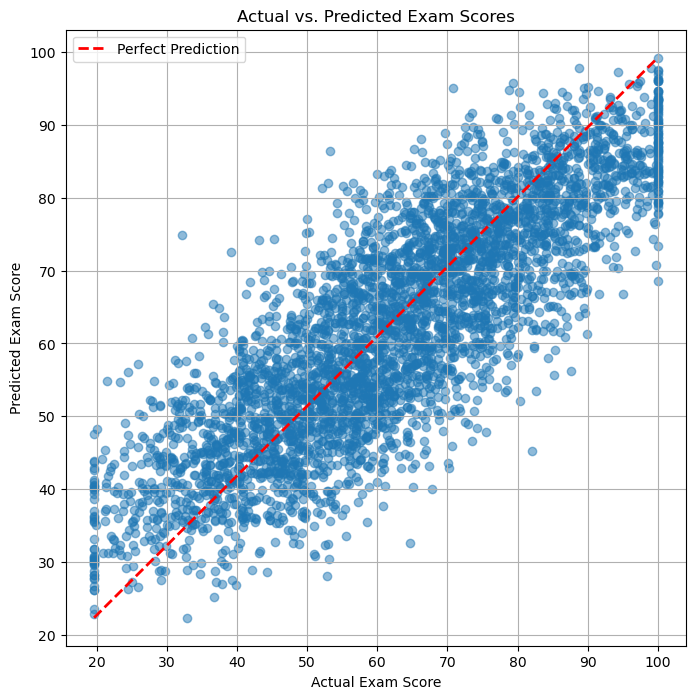

In [93]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Exam Scores')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.legend()
plt.grid(True)
plt.show()

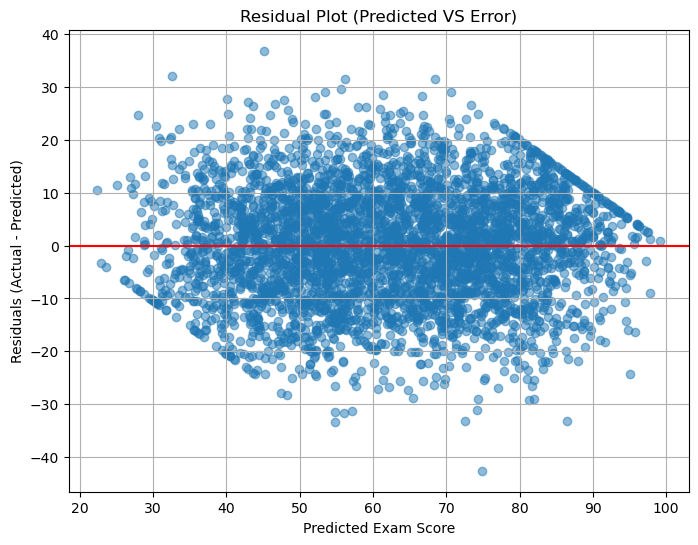

In [94]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-') 
plt.title('Residual Plot (Predicted VS Error)')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()